In [1]:
from GaussianGenerator import GaussianGenerator
import numpy as np
import threading
import communicator
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import socket

In [2]:
def GaussianGenerator (n1, n2):
	mean1 = [3, 6]
	cov1 = [[1,0], [0,1]]
	x1 = np.random.multivariate_normal(mean1,cov1, n1)
	y1 = np.ones(n1)
	
	mean2 = [-1,0]
	cov2 = [[2,0],[0,2]]
	x2 = np.random.multivariate_normal(mean2,cov2, n2)
	y2 = -np.ones(n2)
	
	plt.plot(x1[:,0], x1[:,1], 'x')
	plt.plot(x2[:,0], x2[:,1], '*')
	#plt.show()
	plt.savefig("gaussian.png")
	

	X = np.concatenate((x1,x2), axis = 0)
	Y = np.concatenate((y1,y2), axis = 0)
	return X,Y

In [3]:
DEBUG = True
BACKLOG = 5
HEADERSIZE = 10


class Server:

	def __init__(self, port):
		"""
		Server object that can accept request at port=port
		Create a SOCK_STREAM socket and bind at localhost at port
		"""
		self.s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
		self.s.bind((socket.gethostname(), port))
		self.s.listen(BACKLOG)  # backlog = 5 by default
		self.clientsock = None
		self.clientaddress = None

	def recv(self):
		"""
		Blocking recv. Block to accept and receive.
		:return: msg to be pickled
		"""
		self.clientsock, self.clientaddress = self.s.accept()

		#if DEBUG:
			#print(f"Received message from {self.clientaddress}")

		full_msg = b''
		new_msg = True
		msglen = 0
		while True:  # receive full length
			msg = self.clientsock.recv(16)
			if new_msg:
				#print("new msg len:", msg[:HEADERSIZE])
				msglen += int(msg[:HEADERSIZE])
				new_msg = False
			full_msg += msg
			if len(full_msg) - HEADERSIZE == msglen:
				#print("full msg recvd")
				return pickle.loads(full_msg[HEADERSIZE:])

	def reply(self, msg, port):
		"""
		Reply to msg that we just received from
		:return: num_byte_sent
		"""
		
		loc = (self.clientaddress[0],port)
		#print(loc)
		return self.send(loc, msg)

	def get_socket(self):
		return self.s

	def send(self, location: (str, str), msgtosend):
		"""
		Send msg to location
		:param location: specify (address, port) to be sent to
		:param msgtosend: the msg will be pickled
		:return:
		"""
		s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
		s.connect(location)
		msg = pickle.dumps(msgtosend)
		msg = bytes(f"{len(msg):<{HEADERSIZE}}", 'utf-8') + msg
		return s.send(msg)


In [4]:
PORT = 1232
serv_model = communicator.Server(PORT)
PORT2 = 1233
serv_grad = communicator.Server(PORT2)


w = np.array([0.0,0.0,0.0])

In [5]:
def model_server():
	print("model server thread is up")
	global w
	while True:
		result = serv_model.recv()
		#print(f"Received obj of type {str(type(result))} and content:\n{str(result)}")
		
		#send weights
		serv_model.reply(w, PORT)
		#print(f"Sent obj of type {str(type(w))} and content:\n{str(w)}")

In [6]:
def show_image(X, w):
	fig = plt.figure()
	plt.plot(X[:100,1], X[:100,2], 'x')
	plt.plot(X[100:,1], X[100:,2], '*')
	z1 = np.linspace(-6,6,100)
	z2 = - w[1]/w[2]*z1 - w[0]/w[2]
	plt.plot(z1, z2, '-g')
	plt.ylim(-4,8)
	plt.xlim(-6,6)
	plt.show() 

In [7]:
def show_mal_image(X, w1, w2):
	fig = plt.figure()
	plt.plot(X[:100,1], X[:100,2], 'x')
	plt.plot(X[100:,1], X[100:,2], '*')
	z1 = np.linspace(-6,6,100)
	z2 = - w1[1]/w1[2]*z1 - w1[0]/w1[2]
	plt.plot(z1, z2, '-g')
	z3 = - w2[1]/w2[2]*z1 - w2[0]/w2[2]
	plt.plot(z1, z3, '-r')
	plt.ylim(-4,8)
	plt.xlim(-6,6)
	plt.show() 

model server thread is upGrad from updater is [0. 0. 0.]

Received gradient [4.11022025 3.79755985 7.05414986]
New weights are [-0.03409326  0.05076118  0.01095735]


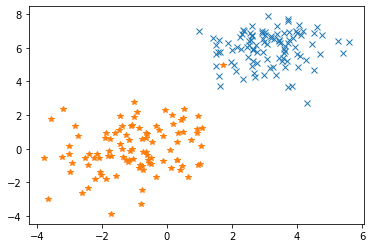

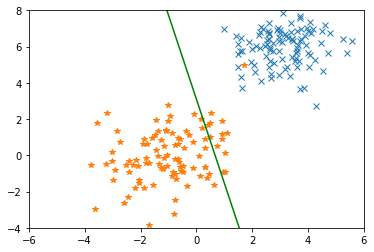

('172.18.0.3', 1232)
Received gradient [1.86187884 2.41598319 2.49951556]
New weights are [-0.03409326  0.05076118  0.01095735]


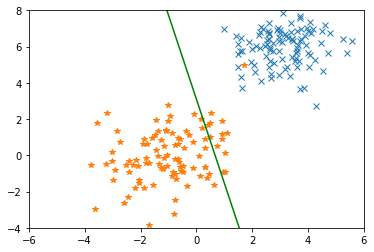

('172.18.0.3', 1232)
Received gradient [ 1.65327818  5.45909418 -0.15568397]
New weights are [-0.03409326  0.05076118  0.01095735]


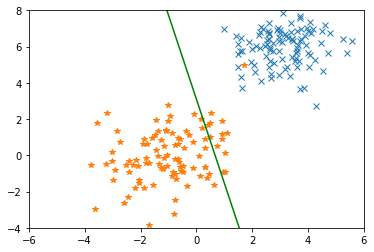

('172.18.0.3', 1232)
Received gradient [-1.69626908 -7.93890532 -2.95629186]
New weights are [-0.03409326  0.05076118  0.01095735]


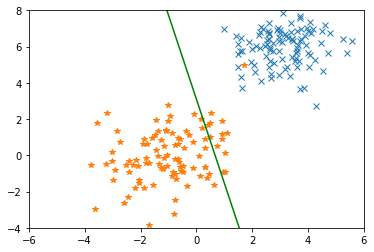

('172.18.0.3', 1232)
Received gradient [-4.73236072 -7.59213471 -4.18251726]
New weights are [-0.03409326  0.05076118  0.01095735]


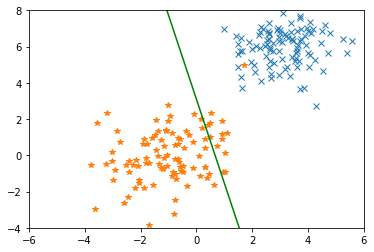

('172.18.0.3', 1232)
Received gradient [0. 0. 0.]
New weights are [-0.03409326  0.05076118  0.01095735]


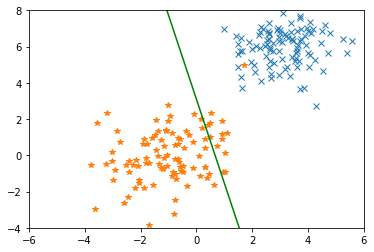

('172.18.0.3', 1232)
Received gradient [ 8.20671173  3.76267822 -2.29141247]
New weights are [-0.03409326  0.05076118  0.01095735]


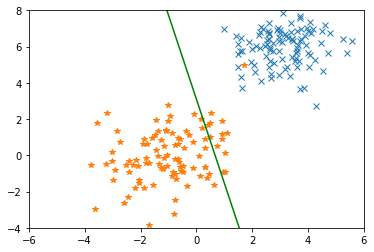

('172.18.0.3', 1232)
Received gradient [-28.8296821   93.67024686  -8.18964418]
New weights are [-0.03409326  0.05076118  0.01095735]


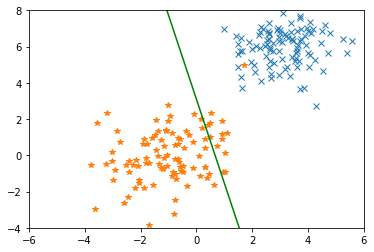

('172.18.0.3', 1232)
Received gradient [-10.01471349 107.03548644  38.79808785]
New weights are [-0.03409326  0.05076118  0.01095735]


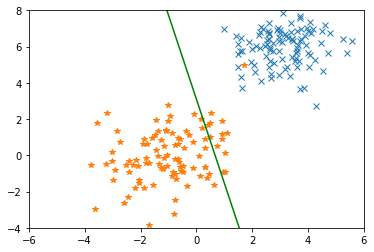

('172.18.0.3', 1232)
Received gradient [ -72.49826212  124.60079079 -170.20563324]
New weights are [-0.03409326  0.05076118  0.01095735]


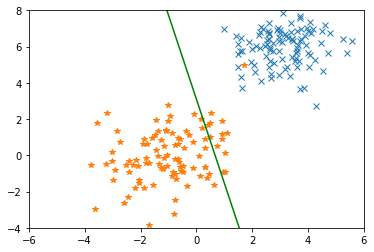

Grad from updater is [0.1        0.05008083 0.0997927 ]
('172.18.0.3', 1232)
Received gradient [-123.50213302   12.28368437  -99.83144667]
New weights are [-0.02247118  0.04960523  0.02035192]


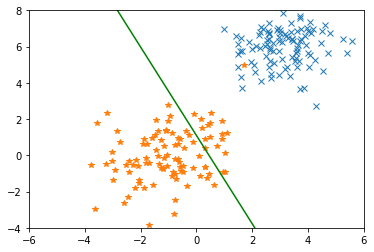

('172.18.0.3', 1232)
Received gradient [ 0.1        -0.04826024  0.2978651 ]
New weights are [-0.02718633  0.05188078  0.00630713]


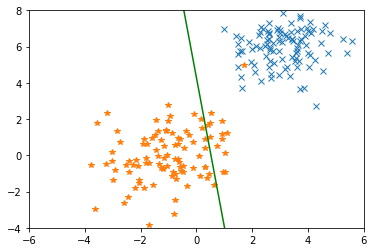

('172.18.0.3', 1232)
Received gradient [ 0.1         0.06023167 -0.00749167]
New weights are [-0.03999969  0.04416307  0.00726707]


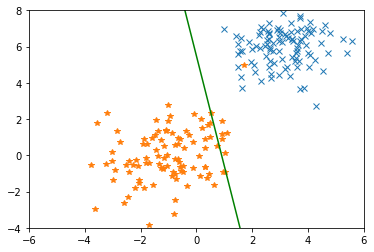

('172.18.0.3', 1232)
Received gradient [0. 0. 0.]
New weights are [-0.03999969  0.04416307  0.00726707]


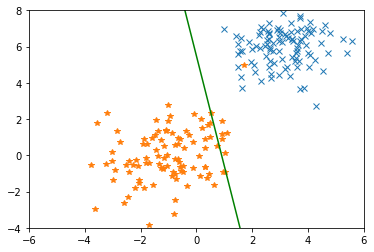

('172.18.0.3', 1232)
Received gradient [0. 0. 0.]
New weights are [-0.03999969  0.04416307  0.00726707]


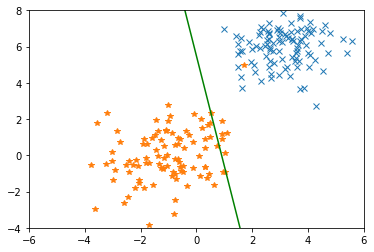

In [ ]:
maxit = 1000
k = 10
ns = 10
gamma = 0.1
epsilon = 0.1
rho = 0.002

X, Y = GaussianGenerator(100,100)
x_temp = np.ones((200,1))
X = np.concatenate((x_temp,X),axis = 1)



step = 0

th = threading.Thread(target=model_server, daemon=True)
th.start()

while (step <= 1000):
	if (step%k==0):
		#updater
		r = np.random.choice(200, ns)
		x = X[r]
		y = Y[r]
		#print(f"The sample is {str(x)} with labels {str(y)}")

		v = np.array([0,0,0])
		for i in range(ns):
			if ((np.dot(w,x[i])>=0 and y[i]==-1) or (np.dot(w,x[i])<0 and y[i]==1)):
				v = v -np.multiply(y[i],x[i])
				#print(f"There was a misclassification, new grad is {str(v)}")
		
		v = v/ns
		print(f"Grad from updater is {str(v)}")

	while True:
		#receive g
		g_tilde = serv_grad.recv()
		print(f"Received gradient {str(g_tilde)}")
		if (np.linalg.norm(g_tilde)!= 0):
			c = np.linalg.norm(v)/np.linalg.norm(g_tilde)
			g = [c*e for e in g_tilde]
		else:
			g = g_tilde
		if (gamma*np.dot(v,g)-rho*(np.linalg.norm(g)**2)>=-gamma*epsilon):
			break
		else:
			print("Rejected gradient\n")
			u_g = np.array([gamma*e for e in g])
			w2 = w - u_g
			show_mal_image(X, w, w2)

	u_g = np.array([gamma*e for e in g])
	w = w - u_g
	print(f"New weights are {str(w)}")
	show_image(X,w)



	step += 1